In [1]:
from pathlib import Path
import itertools
import seaborn as sns
import folium
from folium.plugins import HeatMap
from matplotlib import colormaps
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.options.display.max_rows = None

In [3]:
home_dir = Path.home()
inside_airbnb_data_dir = home_dir / 'Programming/data/inside-airbnb/london'

In [4]:
inside_airbnb_data_file = inside_airbnb_data_dir / 'selected_short_term_rentals_with_distances.csv'
inside_airbnb_df = pd.read_csv(inside_airbnb_data_file, keep_default_na=False, thousands=',')

In [5]:
inside_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   borough              1489 non-null   object 
 1   latitude             1489 non-null   float64
 2   longitude            1489 non-null   float64
 3   property_type        1489 non-null   object 
 4   room_type            1489 non-null   object 
 5   bathrooms            1489 non-null   float64
 6   bedrooms             1489 non-null   float64
 7   price                1489 non-null   float64
 8   minimum_nights       1489 non-null   int64  
 9   crime_rate           1489 non-null   float64
 10  amenities            1489 non-null   object 
 11  nearest_station      1489 non-null   object 
 12  distance_to_station  1489 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 151.4+ KB


In [6]:
inside_airbnb_df.drop(['room_type', 'nearest_station'], axis=1, inplace=True)

In [7]:
inside_airbnb_df.nunique()

borough                  33
latitude               1312
longitude              1332
property_type            14
bathrooms                14
bedrooms                 10
price                   331
minimum_nights           66
crime_rate               33
amenities               233
distance_to_station    1339
dtype: int64

In [8]:
inside_airbnb_df.head()

,borough,latitude,longitude,property_type,bathrooms,bedrooms,price,minimum_nights,crime_rate,amenities,distance_to_station
0,Lambeth,51.491476,-0.111514,Entire rental unit,1.0,1.0,150.0,30,137.98,None,0.520193
1,Kensington and Chelsea,51.485660,-0.184150,Entire rental unit,2.0,2.0,195.0,91,118.02,"Nightlife, Restaurant",0.956708
2,Brent,51.538990,-0.197440,Entire rental unit,1.5,2.0,83.0,30,117.59,Grocery Store,0.481797
3,Kensington and Chelsea,51.517320,-0.200500,Entire rental unit,1.0,2.0,288.0,91,118.02,Restaurant,0.398479
4,Westminster,51.496950,-0.138880,Entire rental unit,3.0,4.0,901.0,186,132.94,"Restaurant, Retail",0.200253


## Interactive plots

In [9]:
london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=12, tiles='CartoDB Voyager')

In [10]:
borough_names = inside_airbnb_df['borough'].unique()
num_locations = len(borough_names)
colormap = list(itertools.chain(
    colormaps['tab20b'].colors,
    colormaps['tab20c'].colors
))
location_colors = {loc: colors.rgb2hex(colormap[i]) for i, loc in enumerate(borough_names)}

In [11]:
for _, row in inside_airbnb_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        color=location_colors[row['borough']],
        fill=True,
        fill_color=location_colors[row['borough']],
        fill_opacity=0.6,
        weight=0,
    ).add_to(london_map)

In [12]:
density_map_file = inside_airbnb_data_dir / 'html/density_map.html'
if not density_map_file.exists():
    london_map.save(density_map_file)
london_map

In [13]:
_ = HeatMap(
        inside_airbnb_df[['latitude', 'longitude']].values,
        radius=30,
        blur=20,
        min_opacity=0.2,
        max_opacity=0.8,
).add_to(london_map)

In [14]:
heat_map_file = inside_airbnb_data_dir / 'html/heat_map.html'
if not heat_map_file.exists():
    london_map.save(inside_airbnb_data_dir / 'html/heat_map.html')
london_map

## Exploratory data analysis

In [15]:
borough_sr = inside_airbnb_df.borough.value_counts(ascending=False)

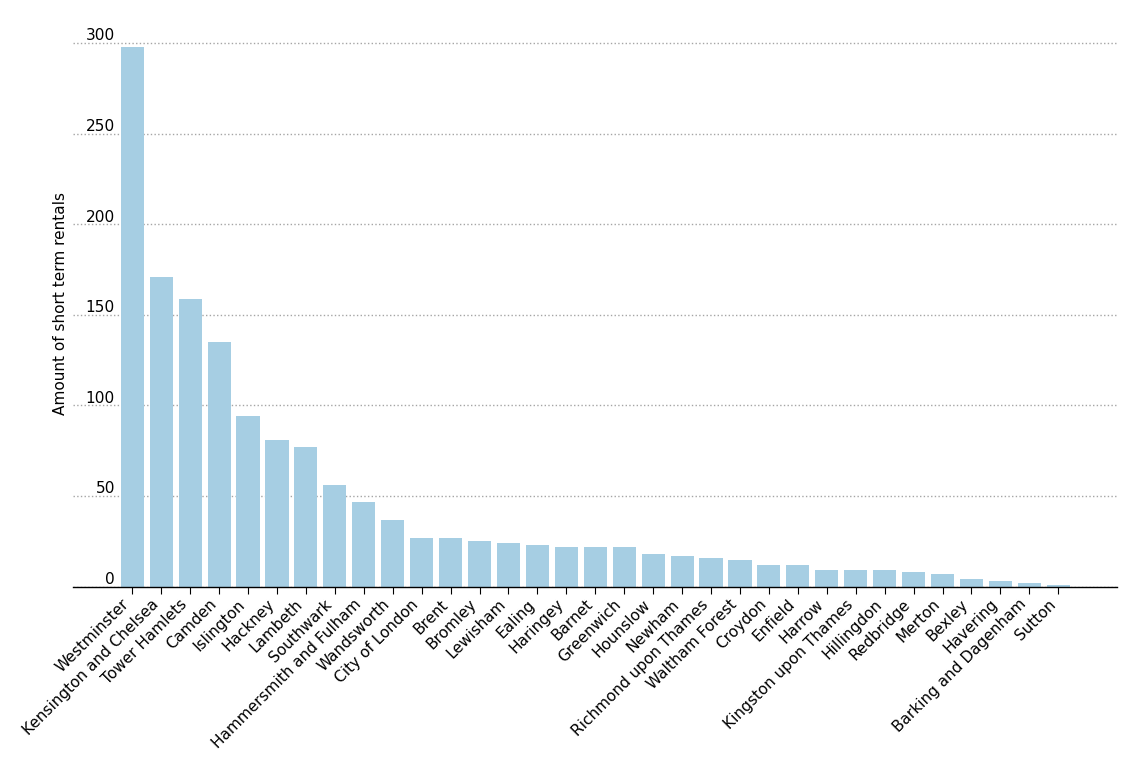

In [16]:
mplstyle_file = inside_airbnb_data_dir / 'barplot-style.mplstyle'
plt.style.use(mplstyle_file)
fig, ax = plt.subplots( nrows=1, ncols=1)
ax.bar(borough_sr.index, borough_sr.values)
ax.set_ylabel('Amount of short term rentals')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right');

In [17]:
prices_data = inside_airbnb_df.price.values
prices_data = prices_data.astype('float')

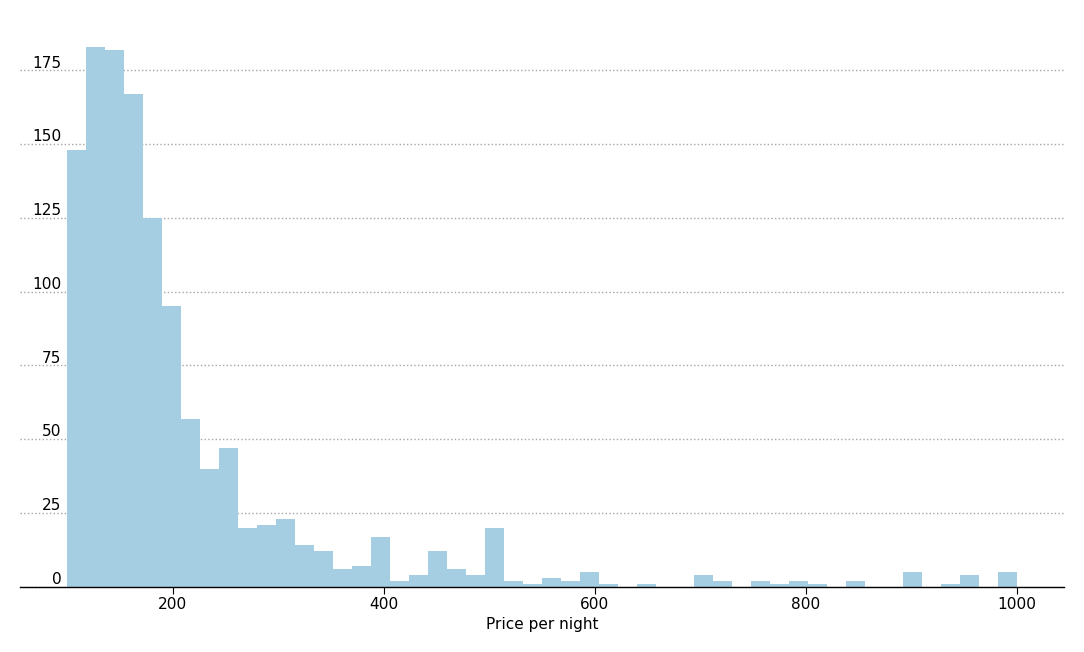

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(prices_data, bins=50, range=[100, 1000])
ax.set_xlabel('Price per night');

In [19]:
property_type_sr = inside_airbnb_df.property_type.value_counts(ascending=False)

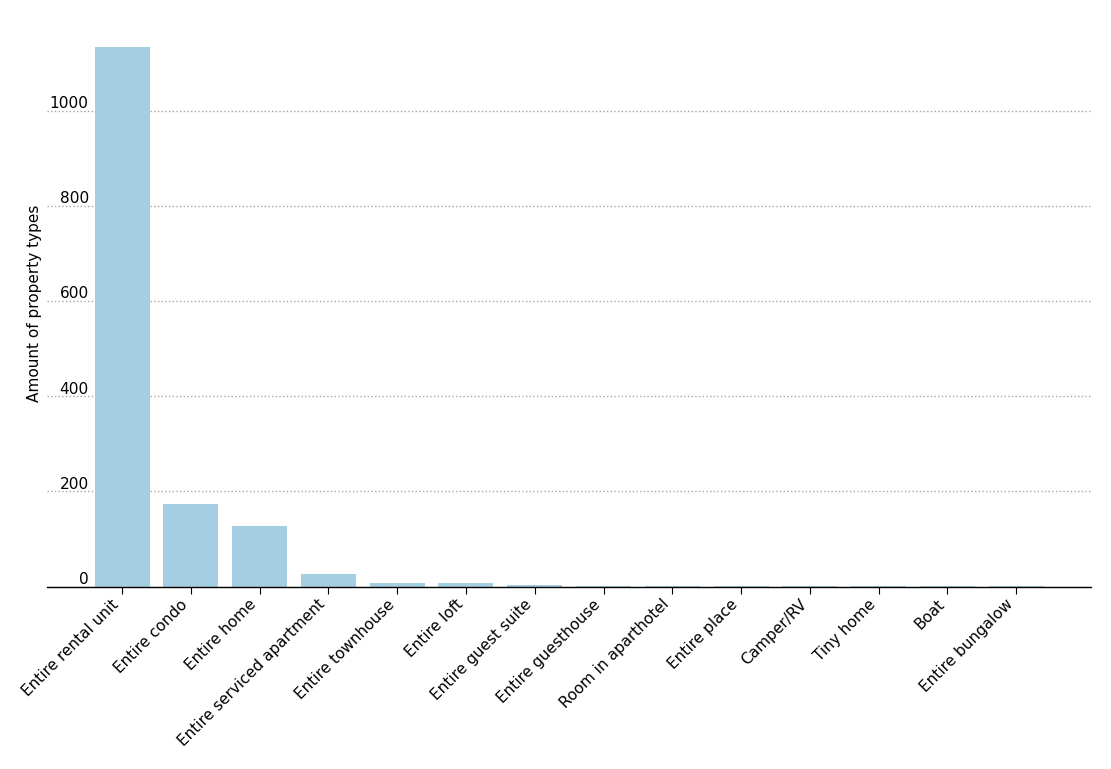

In [20]:
fig, ax = plt.subplots( nrows=1, ncols=1)
ax.bar(property_type_sr.index, property_type_sr.values)
ax.set_ylabel('Amount of property types')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right');